In [ ]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!mkdir emotions
%cd emotions

Saving kaggle.json to kaggle.json
/content/emotions


In [ ]:
!kaggle datasets list -s Face-expression-recognition-dataset

ref                                                                  title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
jonathanoheix/face-expression-recognition-dataset                    Face expression recognition dataset                 121MB  2019-01-03 08:16:53          23164        347  0.1875           
selfishgene/youtube-faces-with-facial-keypoints                      YouTube Faces With Facial Keypoints                  16GB  2021-10-06 03:11:11          10073        316  0.9411765        
arashnic/faces-age-detection-dataset                                 Faces: Age Detection Dataset                         48MB  2020-12-06 21:25:11           3683         56  0.9375           
apollo2506/facial-recognition-datas

In [ ]:
!kaggle datasets download jonathanoheix/face-expression-recognition-dataset

 94% 113M/121M [00:01<00:00, 114MB/s]  
100% 121M/121M [00:01<00:00, 68.3MB/s]


In [ ]:
!unzip face-expression-recognition-dataset

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2
# Importing Deep Learning Libraries

from keras.utils import load_img, img_to_array, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

PreProcessing

In [ ]:
def Normalisation(img):
  img_normalized = cv2.normalize(img, None, 0, 1.0,
  cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  return img_normalized


In [ ]:
def Histogram_equilisation(img):
  
  equ = cv2.equalizeHist(img)
  return equ

In [ ]:
def convert_image_arry(image):
  try:
    # image = cv2.imread(image_path)
    if image is not None:
      image = cv2.resize(image,(64,64))
      return(img_to_array(image))
    else:
      return np.array([])
  except Exception as e:
    print("Error",e)

In [ ]:
path='/content/emotions/images/train'
root_dir=os.listdir(path)
root_dir

In [ ]:
# !apt-get install libmagickwand-dev

In [ ]:


# gauss_noise=np.zeros((64,64),dtype=np.uint8)
# cv2.randn(gauss_noise,128,20)
# gauss_noise=(gauss_noise*0.5).astype(np.uint8)
kernel = np.ones((5,5),np.uint8)

image_list,image_label=[],[]
temp=-1
for dir in root_dir:
  new_list=os.listdir(path+'/'+dir)
  temp+=1
  for i in new_list:
    img_path=path+'/'+dir+'/'+i
    image = cv2.imread(img_path)
    image_res= cv2.resize(image,(64,64))

    # noice=cv2.add(image_res,gauss_noise)
    # norm= cv2.normalize(image_res, None, 0, 1.0,cv2.NORM_MINMAX)
    
    # dst = cv2.fastNlMeansDenoisingColored(image_res,None,10,10,7,21)
    graying = cv2.cvtColor(image_res, cv2.COLOR_BGR2GRAY)
    
    # r1,thresh1 =cv2.threshold(graying,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # histo=cv2.equalizeHist(graying)
    
    erosion = cv2.erode(graying,kernel,iterations = 1)
    dilation = cv2.dilate(erosion,kernel,iterations = 1)
    histo=cv2.equalizeHist(dilation)
    image_list.append(convert_image_arry(histo))
    image_label.append(temp)
print(image_label)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
image_list[1]

array([[[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [10.],
        [10.],
        [10.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [15.],
        [14.],
        [13.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [21.],
        [17.],
        [16.]],

       ...,

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [58.],
        [58.],
        [58.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [56.],
        [53.],
        [53.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [53.],
        [52.],
        [52.]]], dtype=float32)

In [ ]:
norm_image_list=np.array(image_list,dtype=np.float16)/255.0

In [ ]:
norm_image_list.shape

(28821, 64, 64, 1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(norm_image_list, image_label, random_state = 0)

In [ ]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)


In [ ]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (64,64,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       2

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
hist=model.fit(xtrain,ytrain,epochs=6,validation_split=0.2,batch_size=16)

Epoch 1/6
1081/1081 [==============================] - 24s 22ms/step - loss: 0.9952 - accuracy: 0.6258 - val_loss: 1.2689 - val_accuracy: 0.5316
Epoch 2/6
1081/1081 [==============================] - 23s 22ms/step - loss: 0.9265 - accuracy: 0.6543 - val_loss: 1.1995 - val_accuracy: 0.5522
Epoch 3/6
1081/1081 [==============================] - 23s 22ms/step - loss: 0.8568 - accuracy: 0.6800 - val_loss: 1.1954 - val_accuracy: 0.5612
Epoch 4/6
1081/1081 [==============================] - 24s 22ms/step - loss: 0.7813 - accuracy: 0.7104 - val_loss: 1.4483 - val_accuracy: 0.4990
Epoch 5/6
1081/1081 [==============================] - 22s 21ms/step - loss: 0.7208 - accuracy: 0.7339 - val_loss: 1.3478 - val_accuracy: 0.5473
Epoch 6/6
1081/1081 [==============================] - 23s 22ms/step - loss: 0.6577 - accuracy: 0.7602 - val_loss: 1.3469 - val_accuracy: 0.5487


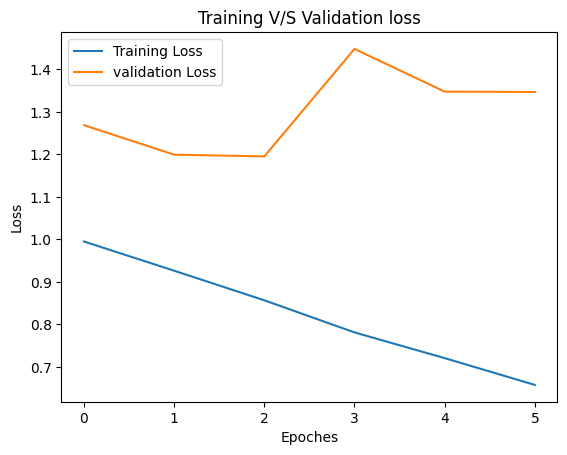

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title("Training V/S Validation loss")
plt.legend()

In [ ]:
model.evaluate(xtest,ytest)

226/226 [==============================] - 2s 9ms/step - loss: 1.4279 - accuracy: 0.5228


[1.4278651475906372, 0.5227588415145874]

In [ ]:
y_pred=model.predict(xtest)

226/226 [==============================] - 2s 6ms/step


In [ ]:
ypred=np.argmax(y_pred,axis=1)
yactual=np.argmax(ytest,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yactual, ypred)

array([[1179,   13,   58,  162,  139,   57,  151],
       [   3,   59,    9,   14,    7,    6,    6],
       [  33,   31,  397,  206,  130,   33,  133],
       [  28,   21,  109,  472,  164,  112,  114],
       [  57,   20,  139,  280,  463,   44,  245],
       [  28,    5,   24,  124,   38,  549,   42],
       [  81,   10,  116,  159,  235,   53,  648]])

In [ ]:
rud=cv2.imread("/content/croped.jpg")
rud1=cv2.resize(rud,(64,64))
kernel = np.ones((5,5),np.uint8)
gray = cv2.cvtColor(rud1, cv2.COLOR_BGR2GRAY)
erosion = cv2.erode(gray,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 1)
histo=cv2.equalizeHist(dilation)
image_list1=convert_image_arry(histo)
norm_image_list1=np.array(image_list1,dtype=np.float16)/255.0
a=norm_image_list1.reshape(-1,64,64,1)
a.shape

(1, 64, 64, 1)

In [ ]:
y=model.predict(a)


1/1 [==============================] - 0s 33ms/step


In [ ]:
ypred=np.argmax(y,axis=1)
ypred
# ['happy', 'disgust', 'angry', 'fear', 'sad', 'surprise', 'neutral']

array([2])